# Finch Carr Homework 04
## Problem 0
- I want to make a fake background data set with a time axis from 0 to 100$\pi$ in 1e5 steps, an offset sinusoid output using that time axis as the input, and random background data whose mean and variance depend on a variable $N$

In [1]:
# Finch's Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import random
%matplotlib inline

In [2]:
# Time axis
t = np.linspace(0,np.pi*100,np.int(1e5))

# Offset sinusoid
N = 10 + np.sin(t)

# Randomized Background data
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

- This data set is small enough that I ***could*** plot it, but it is messy and uninformative

## Problem 1)
- I want to plot small portions of the data using array slicing

### Problem 1A)
- I want to figure out how to make a scatterplot of the first 1000 data points in my data

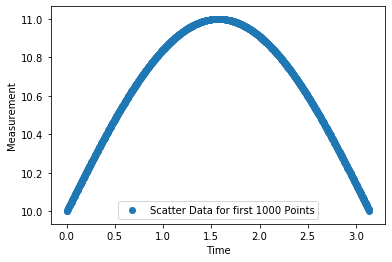

In [3]:
# Define the data points for first 1000 elements of 't' array
scatterX = t[0:1000]
scatterY = 10+np.sin(scatterX)

fig, ax = plt.subplots(1,1)
ax.scatter(scatterX, scatterY, label='Scatter Data for first 1000 Points')
ax.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.show()

### Problem 1B)
- I want to generalize the code from **Problem 1A** such that I can plot any amount $X$ of contiguous points. After generalizing, I want to produce an example plot somewhere in the middle of my array.

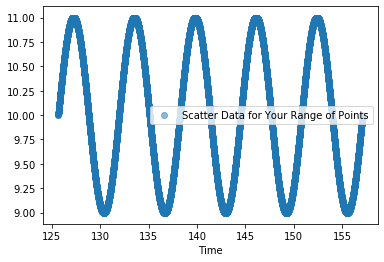

Range of points is from t=125.66496279321967 to t=157.08120349152458


In [4]:
def scatter(startT, stopT):
    scatterU = t[startT:stopT]
    scatterV = 10+np.sin(scatterU)
    
    fig, ax = plt.subplots(1,1)
    ax.scatter(scatterU, scatterV, alpha=0.5, label='Scatter Data for Your Range of Points')
    ax.legend(loc='best')
    plt.xlabel('Time')
    plt.show()
    print(f'Range of points is from t={t[startT]} to t={t[stopT]}')

scatter(40000, 50000)

- Now I can use my new ***scatter*** function to plot any range of continuous points within my data set

### Problem 1C)
- Now that I have generalized my code, I want to define a way to take certain samples of the data, such as a plot of every 100th point

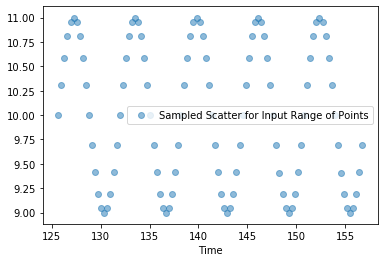

Range of plotted points is every 100 points from t=125.66496279321967 to t=157.08120349152458


In [5]:
def sample(startT, stopT, stepT):
    scatterJ = t[startT:stopT:stepT]
    scatterK = 10+np.sin(scatterJ)
    
    fig, ax = plt.subplots(1,1)
    ax.scatter(scatterJ, scatterK, alpha=0.5, label='Sampled Scatter for Input Range of Points')
    ax.legend(loc='best')
    plt.xlabel('Time')
    plt.show()
    print(f'Range of plotted points is every {stepT} points from t={t[startT]} to t={t[stopT]}')

sample(40000, 50000, 100)

- Now I can use my new ***sample*** function to plot any sample of data from my dataset
## Problem 2)
- Now I can make a scatter plot of just a 100,000 points, but it won't be helpful. It will be better to plot the density of the points. There are several ways of doing this, but a 2D histogram plot is the easiest.
### Problem 2A)
- I want to make a 2D histogram plot with optimized bin sizing such that my data is interpretable and well-plotted. Instead of using a scatterplot to plot each individual point, I want to use the 2D histogram to plot the density of points for my output values (i.e. the range of values that putting the data into the offset sinusoid produces when $t$ is input into $N$

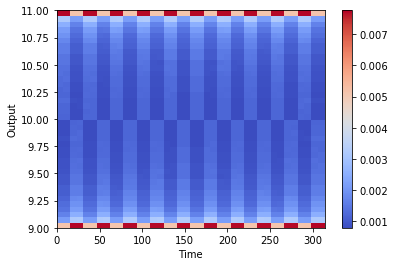

In [6]:
# Recall the Time axis and my Offset sinusoid
t = np.linspace(0,np.pi*100,np.int(1e5))
N = 10 + np.sin(t)

# Define a bin variable to test different output formats since histogram output is affected by bin size
box = 40

#Let's plot the density of the output values for every input t value
fig, ax = plt.subplots(1,1)
plot = ax.hist2d(t, N, bins=(box,box), density=True, cmap='coolwarm')
plt.colorbar(plot[3])
plt.xlabel('Time')
plt.ylabel('Output')
plt.show()

- The plot above shows the density of output values between 9 and 11 from the created offset-sinusoid as they occur on the time axis we created
- The colorbar on the right shows how certain color tones from blue to red are assigned to density values of (x,y) pairings. Bluer tones indicate less points around those areas, while redder tones signal that there are many points in the  rectangular area specified by that color shade. Looking towards the max and min y-limits, dark red areas osillating with a very pinkish-white color, which corresponds to the oscillation of the sinusoid I plotted. 
  - The dark maroon corresponds to a peak/trough of the sinusoid plot at $y_{max}=11$ or $y_{min}=9$, while the pink corresponds to the areas just before and after the peaks and troughs where only some smaller percentage of values can be found, but not to the same scale as the peaks and troughs themselves. 
  - The large areas of varying blues found between $09.10 \leq y \leq 10.90$ are bluer because moving left to right on the x-axis input causes very fast rises and falls in the y-axis output such that a high density of output values are pushed to the max and min of 11 and 9 respectively, while very few values congregate around the mean output value of 10. This is what I would expect from a sinusoidal function of any kind

## Problem 3)
- If I have a periodic signal, it is possible to **fold** the data stream at that period to make the pattern of the data more apparent
### Problem 3A)
- First, I am asked to make a new time variable that folds at a period of $2\pi$, then I need to make another scatter plot of only a limited set of points, but on a folded axis
  - The original time axis went from $0$ to $100\pi$ with 100,000 total points, so the new axis will go from $0$ to $2\pi$ with $100000 / 50$ points
  - After the code plots the points of the first period of $2\pi$, I need it to take the output values assign them a phase value such that it begins plotting at the 0 of the x-axis again, and to repeat this enough times to have the final scatterplot have a defined shape consisting of groupings of scatter points. Since I know my fake data is sinusoidal and the period is $2*pi$, the output I can expect should be a scatterplot of one full sine wave
    - This is like saying for every period of $2\pi$, $y_{t+1}$ becomes the new $y_t$

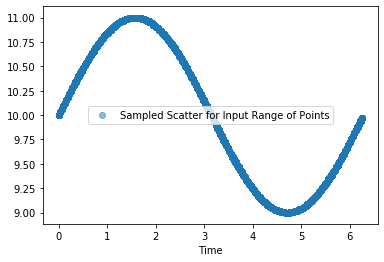

X-axis Range of plotted points is t=0 to t=6.28 on a folded axis of t=0 to t=6.28, with every 10 point from my given array plotted on a 1-period axis
10000


In [46]:
# Need to redefine my x-axis as a folded x-axis
t = np.linspace(0,np.pi*100,np.int(1e5))
def fold(array, arraystep, foldlimit):
    tfold = array[::arraystep] % (foldlimit)
    Nfold = 10 + np.sin(tfold)
    fig, ax = plt.subplots(1,1)
    ax.scatter(tfold, Nfold, alpha=0.5, label='Sampled Scatter for Input Range of Points')
    ax.legend(loc='best')
    plt.xlabel('Time')
    plt.show()
    print(f'X-axis Range of plotted points is t=0 to t=6.28 on a folded axis of t=0 to t=6.28, with every {arraystep} point from my given array plotted on a 1-period axis')
    print(len(tfold))
fold(t, 10, 2*np.pi)

total = $0, 100\pi, 100000$

new =   $0, 2\pi, 100000/2\pi$

- My new plot shows one period plotted several times through my t-axis values 
  - These t values have been passed through a modulo operator such that each t value greater than $2\pi$ is recalled back to 0 and the remainder is the new t-value for that datapoint

### Problem 3B)
- Now I want to make a 2D histogram of my folded data like earlier

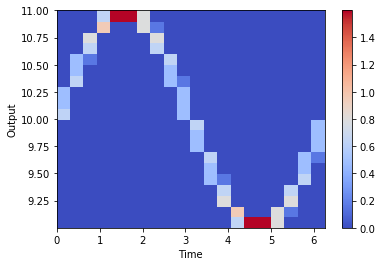

In [51]:
# Recall the Time axis and my Offset sinusoid
tfold = t[::10] % (2*np.pi)
Nfold = 10 + np.sin(tfold)

# Define a bin variable to test different output formats since histogram output is affected by bin size
box = 20

#Let's plot the density of the output values for every input t value
fig, ax = plt.subplots(1,1)
plot = ax.hist2d(tfold, Nfold, bins=(box,box), density=True, cmap='coolwarm')
plt.colorbar(plot[3])
plt.xlabel('Time')
plt.ylabel('Output')
plt.show()

- I see above from my 2D histogram plot that my analysis from the first histogram still applies in that most values congregate to the peaks and troughs of the sinusoid and only some values are found in the mid-regions, but this graph shows multiple periods plotted onto 1 period, as oppposed to the other graph which shows every period in order